In [ ]:
import spacy
import pickle
import random

In [ ]:
train_data = pickle.load(open('train_data.pkl','rb'))

In [ ]:
train_data[0]

('Govardhana K Senior Software Engineer  Bengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/ b2de315d95905b68  Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month • Salesforce Developer Oracle 5 Years 2 Month • Core Java Developer Languages Core Java, Go Lang Oracle PL-SQL programming, Sales Force Developer with APEX.  Designations & Promotions  Willing to relocate: Anywhere  WORK EXPERIENCE  Senior Software Engineer  Cloud Lending Solutions -  Bangalore, Karnataka -  January 2018 to Present  Present  Senior Consultant  Oracle -  Bangalore, Karnataka -  November 2016 to December 2017  Staff Consultant  Oracle -  Bangalore, Karnataka -  January 2014 to October 2016  Associate Consultant  Oracle -  Bangalore, Karnataka -  November 2012 to December 2013  EDUCATION  B.E in Computer Science Engineering  Adithya Institute of Technology -  Tamil Nadu  September 2008 to June 2012  https://www.indeed.com/r/Govardhana-K/b2de315d95905b68?isid=rex-

In [ ]:
nlp = spacy.blank('en')

def train_model(train_data):
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)
        
    for _, annotation in train_data:
        for ent in annotation['entities']:
            ner.add_label(ent[2])
            
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):
        optimizer = nlp.begin_training()
        for itn in range (10):
            print('Starting iteration ', itn)
            random.shuffle(train_data)
            losses = {}
            index = 0
            for text, annotations in train_data:
                try:
                              nlp.update([text],
                              [annotations],
                              drop=0.2,
                              sgd=optimizer,
                              losses=losses)
                except Exception as e:
                    pass
                    
            print(losses)

In [ ]:
train_model(train_data)

Starting iteration  0
Starting iteration  1
Starting iteration  2
Starting iteration  3
Starting iteration  4
Starting iteration  5
Starting iteration  6
Starting iteration  7
Starting iteration  8
Starting iteration  9


In [ ]:
nlp.to_disk('nlp_model')

In [ ]:
nlp_mod = spacy.load('nlp_model')

In [ ]:
doc = nlp_mod(train_data[7][0])
for ent in doc.ents:
    print(ent.label_.upper(), '\t\t\t', {ent.text})

NAME 			 {'Suman Biswas'}
DESIGNATION 			 {'SAP UI5 Lead'}
COMPANIES WORKED AT 			 {'Native HANA Developer'}
LOCATION 			 {'Bengaluru'}
EMAIL ADDRESS 			 {'indeed.com/r/Suman-Biswas/63db95fe3ae14910'}
DESIGNATION 			 {'Software Engineer'}
COMPANIES WORKED AT 			 {'SAP UI5'}
DESIGNATION 			 {'Software Engineer'}
COMPANIES WORKED AT 			 {'Microsoft Technology'}
LOCATION 			 {'Kolkata'}
DEGREE 			 {'MBA in Information Technology'}
COLLEGE NAME 			 {'Sikkim Manipal University'}
DEGREE 			 {'Bachelor of Arts'}
LOCATION 			 {'Kolkata'}
SKILLS 			 {'SAP HANA (4 years), SAP UI5/Fiori (4 years), AngularJs (Less than 1 year), Web Development (8 years), Asp.Net (5 years), C# (4 years), SQL Server (3 years), HTML5 (5 years), Javascript (6 years), CSS3 (6 years), Software Solution Design (2 years), VBA (2 years), SAP BI (2 years)'}


In [ ]:
!pip install PyMuPDF

     |████████████████████████████████| 8.7 MB 31.9 MB/s 


In [ ]:
import sys, fitz

fname = 'Alice Clark CV.pdf'
doc = fitz.open(fname)
text = ""
for page in doc:
    text = text + str(page.getText())

tx = " ".join(text.split('\n'))  # for removing the next line character 
print(tx)

Alice Clark  AI / Machine Learning    Delhi, India Email me on Indeed  •  20+ years of experience in data handling, design, and development  •  Data Warehouse: Data analysis, star/snow flake scema data modelling and design specific to  data warehousing and business intelligence  •  Database: Experience in database designing, scalability, back-up and recovery, writing and  optimizing SQL code and Stored Procedures, creating functions, views, triggers and indexes.  Cloud platform: Worked on Microsoft Azure cloud services like Document DB, SQL Azure,  Stream Analytics, Event hub, Power BI, Web Job, Web App, Power BI, Azure data lake  analytics(U-SQL)  Willing to relocate anywhere    WORK EXPERIENCE  Software Engineer  Microsoft – Bangalore, Karnataka  January 2000 to Present  1. Microsoft Rewards Live dashboards:  Description: - Microsoft rewards is loyalty program that rewards Users for browsing and shopping  online. Microsoft Rewards members can earn points when searching with Bing, bro

Deprecation: 'getText' removed from class 'Page' after v1.19 - use 'get_text'.


In [ ]:
nlp_model = nlp.from_disk('nlp_model/')

doc = nlp_model(tx)
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

NAME                          - Alice Clark
LOCATION                      - Delhi
DESIGNATION                   - Software Engineer
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COLLEGE NAME                  - Indian Institute of Technology – Mumbai
SKILLS                        - Machine Learning, Natural Language Processing, and Big Data Handling


In [ ]:
fname = 'Smith Resume.pdf'
doc = fitz.open(fname)
text = ""
for page in doc:
    text = text + str(page.getText())

tx = " ".join(text.split('\n'))  # for removing the next line character 
print(tx)

Michael Smith  BI / Big Data/ Azure  Manchester, UK- Email me on Indeed: indeed.com/r/falicent/140749dace5dc26f    10+ years of Experience in Designing, Development, Administration, Analysis,  Management  inthe  Business  Intelligence  Data  warehousing,  Client  Server  Technologies, Web-based Applications, cloud solutions and Databases.  Data warehouse: Data analysis, star/ snow flake schema data modeling and design  specific todata warehousing and business intelligence environment.  Database: Experience in database designing, scalability, back-up and recovery,  writing andoptimizing SQL code and Stored Procedures, creating functions, views,  triggers and indexes.   Cloud platform: Worked on Microsoft Azure cloud services like Document DB, SQL  Azure, StreamAnalytics, Event hub, Power BI, Web Job, Web App, Power BI, Azure  data lake analytics(U-SQL).  Big Data: Worked Azure data lake store/analytics for big data processing and Azure  data factoryto schedule U-SQL jobs. Designed and d

Deprecation: 'getText' removed from class 'Page' after v1.19 - use 'get_text'.


In [ ]:
nlp_model = nlp.from_disk('nlp_model/')

doc = nlp_model(tx)
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')

NAME                          - Michael Smith
LOCATION                      - Manchester
EMAIL ADDRESS                 - indeed.com/r/falicent/140749dace5dc26f
DEGREE                        - Business
LOCATION                      - Technologies
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COMPANIES WORKED AT           - Microsoft
COLLEGE NAME                  - The University of Manchester - UK
SKILLS                        - problem solving (Less than 1 year), project lifecycle (Less than 1 y

In [ ]:
import spacy
import pickle 
import random 
import os 
for dirname, _, filenames in os.walk('input'): 
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd

df = pd.read_csv('dataa-final.xlsx - Sheet1.csv', delimiter="\t")


In [ ]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,"long_appx_lots_of_err,NAME"
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,...,4750,5475,11641,3115,3207,3260,10235,5897,1758,3081,6602,5457,1569,2129,3762,4420,9382,5286,4983,6339,3146,4067,2959,3411,2170,4920,4436,3116,2992,4354,2016-03-03 02:01:01,768,1024,9,234,6,1,GB,51.5448,"0.1991,Govardhana K"
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,...,2158,2090,2143,2807,3422,5324,4494,3627,1850,1747,5163,5240,7208,2783,4103,3431,3347,2399,3360,5595,2624,4985,1684,3026,4742,3336,2718,3374,3096,3019,2016-03-03 02:01:20,1360,768,12,179,11,1,MY,3.1698,"101.706,Harini Komaravelli"
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,...,1089,2203,3386,1464,2562,1493,3067,13719,3892,4100,4286,4775,2713,2813,4237,6308,2690,1516,2379,2983,1930,1470,1644,1683,2229,8114,2043,6295,1585,2529,2016-03-03 02:01:56,1366,768,3,186,7,1,GB,54.9119,"-1.3833,Hartej Kathuria"
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,...,6062,11952,1040,2264,3664,3049,4912,7545,4632,6896,2824,520,2368,3225,2848,6264,3760,10472,3192,7704,3456,6665,1977,3728,4128,3776,2984,4192,3480,3257,2016-03-03 02:02:02,1920,1200,186,219,7,1,GB,51.75,"-1.25,Ijas Nizamuddin"
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,...,6771,2819,3682,2511,16204,1736,28983,1612,2437,4532,3843,7019,3102,3153,2869,6550,1811,3682,21500,20587,8458,3510,17042,7029,2327,5835,6846,5320,11401,8642,2016-03-03 02:02:57,1366,768,8,315,17,2,KE,1.0,"38.0,Imgeeyaul Ansari"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,3,2,4,2,3,3,3,3,4,3,1,4,2,5,1,1,1,1,1,1,1,4,1,4,2,2,2,1,2,4,4,2,4,1,4,3,5,1,4,4,...,11686,5783,7247,12782,14449,3931,5619,6535,11464,3786,12904,13483,6800,3702,13218,11680,4732,3166,4601,7796,16649,15235,3653,6544,5448,6232,5501,7134,12723,6431,2016-03-03 06:10:45,1920,1080,11,451,38,3,US,39.7525,"-104.9995,Madhuri Sripathi"
245,4,4,5,4,4,2,5,4,3,2,3,2,5,2,4,3,4,1,2,4,5,5,1,5,1,5,1,5,5,5,4,3,5,1,5,1,5,2,5,4,...,2044,6813,1776,1316,2638,2050,1673,4682,1969,3182,1690,9594,1792,2938,3407,3143,2190,4024,1625,3132,3835,3233,23833,1963,2761,1978,7174,2057,7641,2241,2016-03-03 06:11:02,1366,768,7,224,14,2,IN,20.0,"77.0,Mahesh Vijay"
246,2,2,4,3,3,3,3,5,1,4,4,3,5,2,4,4,3,2,3,3,2,4,2,5,2,4,2,4,4,3,4,2,3,2,3,3,4,3,4,4,...,2683,2633,2150,2084,3268,1917,2516,3418,4251,2734,1931,4868,3134,1951,2450,3051,2335,2233,2651,3850,1950,4068,2166,1834,2333,3600,5616,2049,2800,1832,2016-03-03 06:11:10,768,1024,2,162,122,1,US,41.2587,"-80.8298,Manisha Bharti"
247,4,1,4,3,1,4,1,3,3,5,4,3,5,4,5,3,2,1,4,2,5,5,1,4,1,4,2,5,4,3,3,3,5,5,3,3,3,4,4,3,...,3656,2736,2320,4448,6608,3896,4111,3568,3008,3408,2408,4088,5416,3992,3368,7120,2408,3064,8232,5544,696,2992,1664,3040,2296,11672,5928,2608,2568,2312,2016-03-03 06:11:54,1366,768,14,293,19,27,IE,53.3881,"-6.3756,Manjari Singh"


In [ ]:
columns = df.columns

In [ ]:
for column in columns:
    print(column)

EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err,NAME


In [ ]:
import numpy as np

In [ ]:
X = df[df.columns[0:50]]
pd.set_option('display.max_columns', None)
X

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5,1,5,1,5,1,5,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,3,2,4,2,3,3,3,3,4,3,1,4,2,5,1,1,1,1,1,1,1,4,1,4,2,2,2,1,2,4,4,2,4,1,4,3,5,1,4,4,2,2,4,1,4,2,4,1,2,4
245,4,4,5,4,4,2,5,4,3,2,3,2,5,2,4,3,4,1,2,4,5,5,1,5,1,5,1,5,5,5,4,3,5,1,5,1,5,2,5,4,2,1,4,3,5,1,3,1,5,4
246,2,2,4,3,3,3,3,5,1,4,4,3,5,2,4,4,3,2,3,3,2,4,2,5,2,4,2,4,4,3,4,2,3,2,3,3,4,3,4,4,2,4,2,2,3,4,4,2,3,3
247,4,1,4,3,1,4,1,3,3,5,4,3,5,4,5,3,2,1,4,2,5,5,1,4,1,4,2,5,4,3,3,3,5,5,3,3,3,4,4,3,2,2,4,2,1,2,2,2,3,3


In [ ]:
X = X.fillna(0)
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=10, random_state=0, batch_size=100, max_iter=100).fit(X)

In [ ]:
len(kmeans.cluster_centers_)

10

In [ ]:
one = kmeans.cluster_centers_[0]
two = kmeans.cluster_centers_[1]
three =kmeans.cluster_centers_[2]
four = kmeans.cluster_centers_[3]
five =kmeans.cluster_centers_[4]
six = kmeans.cluster_centers_[5]
seven = kmeans.cluster_centers_[6]
eight = kmeans.cluster_centers_[7]
nine= kmeans.cluster_centers_[8]
ten = kmeans.cluster_centers_[9]
one

array([1.85428051, 3.99271403, 2.73041894, 3.69216758, 2.63570128,
       3.16939891, 2.07650273, 4.04735883, 2.33515483, 4.23315118,
       4.10200364, 2.57923497, 4.65391621, 1.9708561 , 3.60837887,
       3.61930783, 3.44626594, 3.03642987, 3.76867031, 3.82513661,
       1.87249545, 3.9417122 , 1.78142077, 4.25865209, 2.32422587,
       4.19125683, 2.09836066, 3.65209472, 4.03460838, 3.24590164,
       3.73952641, 2.01275046, 4.28961749, 2.43897996, 3.51183971,
       1.9726776 , 4.18214936, 2.15664845, 3.70127505, 3.81420765,
       4.1420765 , 2.00182149, 3.91621129, 1.83970856, 3.33697632,
       2.18397086, 4.27140255, 3.76867031, 4.4863388 , 3.66848816])

In [ ]:
one_scores = {}

one_scores['extroversion_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] - one[9]
one_scores['neuroticism_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] + one[5] + one[6] + one[7] + one[8] + one[9]
one_scores['agreeableness_score'] =  -one[0] + one[1] - one[2] + one[3] - one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['conscientiousness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['openness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] + one[7] + one[8] + one[9]
one_scores

{'agreeableness_score': 1.892531876138432,
 'conscientiousness_score': 0.9635701275045525,
 'extroversion_score': -7.502732240437157,
 'neuroticism_score': 15.39708561020036,
 'openness_score': 9.058287795992712}

In [ ]:
all_types = {'one':one, 'two': two, 'three' :three, 'four':four, 'five':five, 'six': six, 'seven': seven, 'eight': eight,
             'nine': nine, 'ten': ten}

all_types_scores ={}

for name, personality_type in all_types.items():
    personality_trait = {}

    personality_trait['extroversion_score'] =  personality_type[0] - personality_type[1] +personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] - personality_type[7] + personality_type[8] -personality_type[9]
    personality_trait['neuroticism_score'] =  personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['agreeableness_score'] =  -personality_type[0] +personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] +personality_type[4] - personality_type[5] +personality_type[6] -personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['openness_score'] =  personality_type[0] -personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    
    all_types_scores[name] = personality_trait
all_types_scores

{'eight': {'agreeableness_score': 4.043749999999999,
  'conscientiousness_score': -1.4874999999999998,
  'extroversion_score': -10.59375,
  'neuroticism_score': 13.3625,
  'openness_score': 6.912499999999999},
 'five': {'agreeableness_score': -3.2051282051282044,
  'conscientiousness_score': 15.294871794871796,
  'extroversion_score': 11.326923076923077,
  'neuroticism_score': 23.6025641025641,
  'openness_score': 20.47435897435897},
 'four': {'agreeableness_score': -4.024999999999999,
  'conscientiousness_score': 17.325000000000003,
  'extroversion_score': 12.425000000000004,
  'neuroticism_score': 25.55,
  'openness_score': 23.275000000000002},
 'nine': {'agreeableness_score': 0.282786885245903,
  'conscientiousness_score': 4.954918032786884,
  'extroversion_score': -3.8729508196721287,
  'neuroticism_score': 17.135245901639337,
  'openness_score': 13.299180327868848},
 'one': {'agreeableness_score': 1.892531876138432,
  'conscientiousness_score': 0.9635701275045525,
  'extroversion_

In [ ]:
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])
    
    
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))
all_extroversion_normalized

array([0.13428261, 0.78624145, 0.87872721, 1.        , 0.95229641,
       0.39814228, 0.55286011, 0.        , 0.29197064, 0.64321701])

In [ ]:
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]
    
    normalized_all_types_scores[personality_type] = normalized_personality_trait
    
    counter+=1

In [ ]:
normalized_all_types_scores

{'eight': {'agreeableness_score': 1.0,
  'conscientiousness_score': 0.0,
  'extroversion_score': 0.0,
  'neuroticism_score': 0.0,
  'openness_score': 0.0},
 'five': {'agreeableness_score': 0.13169362002139565,
  'conscientiousness_score': 0.8920862083652781,
  'extroversion_score': 0.9522964138766472,
  'neuroticism_score': 0.8402103879026952,
  'openness_score': 0.8288378288378285},
 'four': {'agreeableness_score': 0.033485333151841615,
  'conscientiousness_score': 1.0,
  'extroversion_score': 1.0,
  'neuroticism_score': 1.0,
  'openness_score': 1.0},
 'nine': {'agreeableness_score': 0.5494932905487506,
  'conscientiousness_score': 0.34245411469963494,
  'extroversion_score': 0.2919706404703935,
  'neuroticism_score': 0.3095586380832276,
  'openness_score': 0.3903242369973322},
 'one': {'agreeableness_score': 0.7423164841763862,
  'conscientiousness_score': 0.13028944199359743,
  'extroversion_score': 0.13428260698616745,
  'neuroticism_score': 0.1669403577600295,
  'openness_score': 

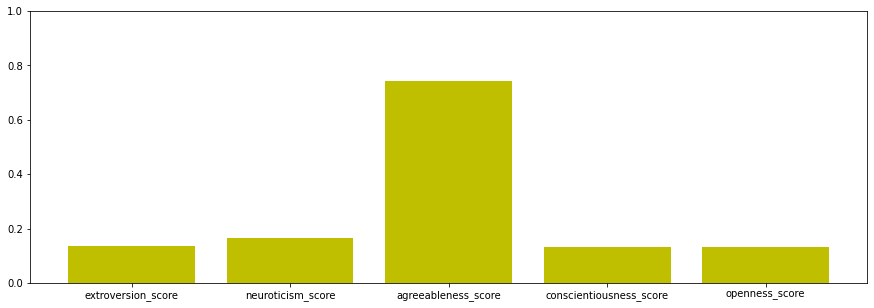

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['one'].keys()), normalized_all_types_scores['one'].values(), color='y')
plt.show()

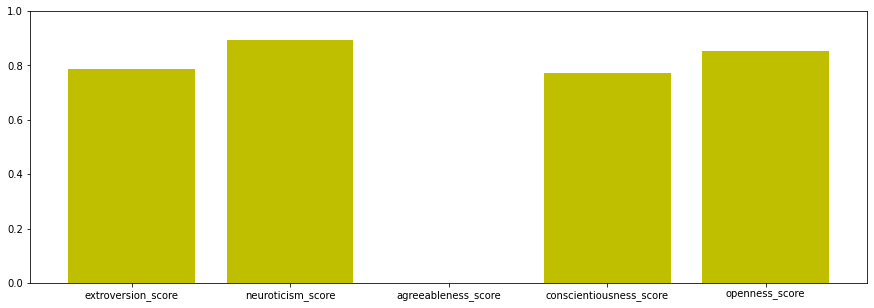

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['two'].keys()), normalized_all_types_scores['two'].values(), color='y')
plt.show()

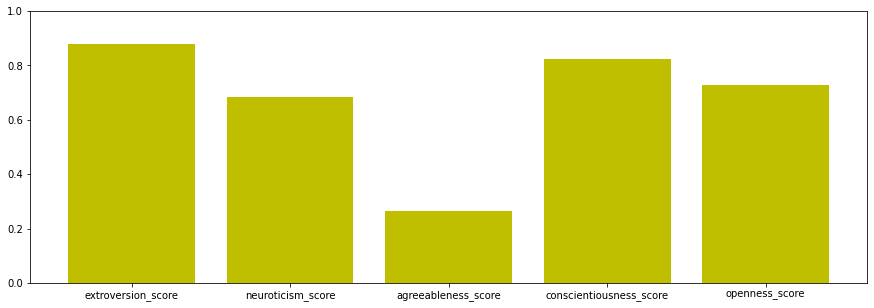

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['three'].keys()), normalized_all_types_scores['three'].values(), color='y')
plt.show()

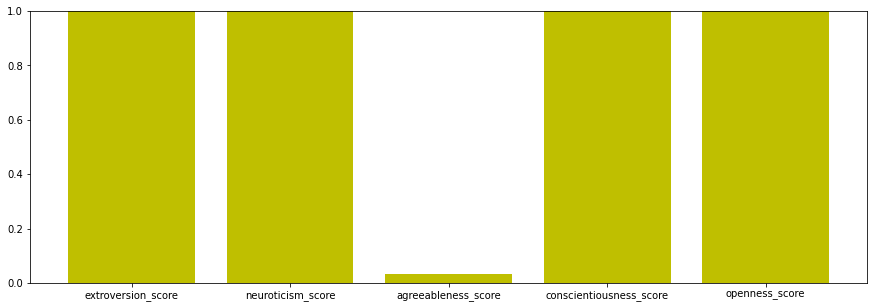

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['four'].keys()), normalized_all_types_scores['four'].values(), color='y')
plt.show()

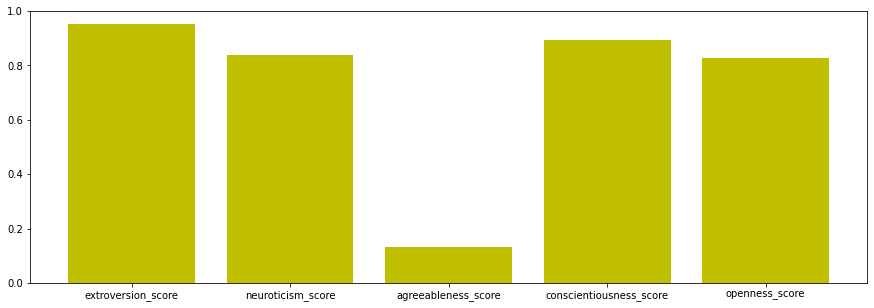

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['five'].keys()), normalized_all_types_scores['five'].values(), color='y')
plt.show()

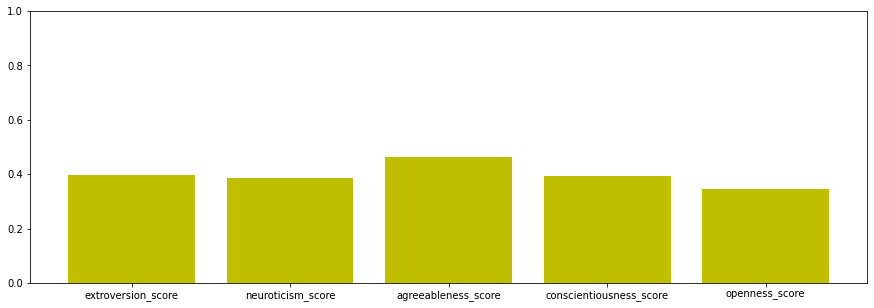

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['six'].keys()), normalized_all_types_scores['six'].values(), color='y')
plt.show()

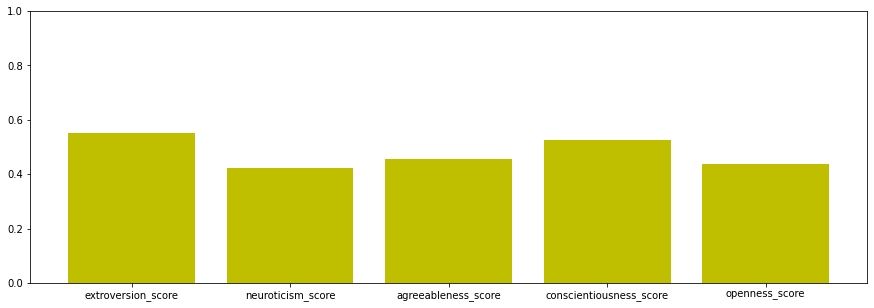

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['seven'].keys()), normalized_all_types_scores['seven'].values(), color='y')
plt.show()

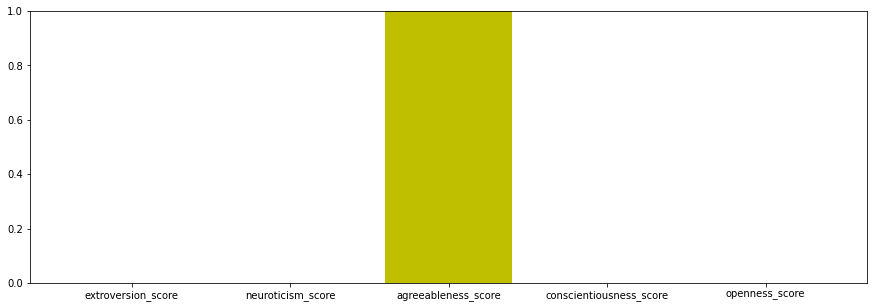

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['eight'].keys()), normalized_all_types_scores['eight'].values(), color='y')
plt.show()

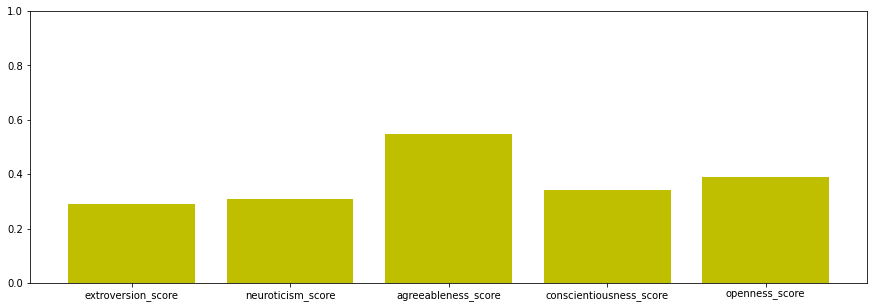

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['nine'].keys()), normalized_all_types_scores['nine'].values(), color='y')
plt.show()

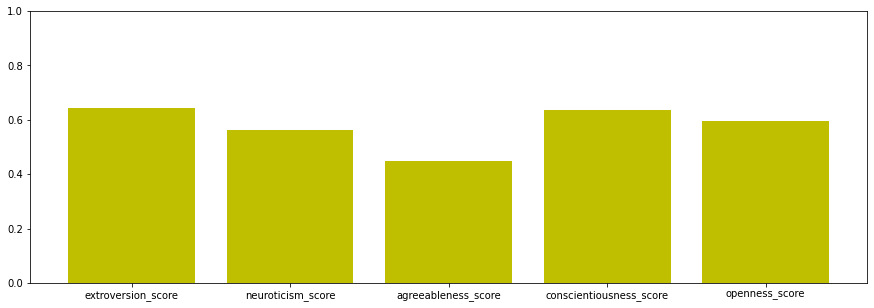

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['ten'].keys()), normalized_all_types_scores['ten'].values(), color='y')
plt.show()

In [ ]:
print(kmeans.cluster_centers_)

[[1.85428051 3.99271403 2.73041894 3.69216758 2.63570128 3.16939891
  2.07650273 4.04735883 2.33515483 4.23315118 4.10200364 2.57923497
  4.65391621 1.9708561  3.60837887 3.61930783 3.44626594 3.03642987
  3.76867031 3.82513661 1.87249545 3.9417122  1.78142077 4.25865209
  2.32422587 4.19125683 2.09836066 3.65209472 4.03460838 3.24590164
  3.73952641 2.01275046 4.28961749 2.43897996 3.51183971 1.9726776
  4.18214936 2.15664845 3.70127505 3.81420765 4.1420765  2.00182149
  3.91621129 1.83970856 3.33697632 2.18397086 4.27140255 3.76867031
  4.4863388  3.66848816]
 [3.3        1.68181818 4.30454545 2.10909091 4.85454545 1.69545455
  4.09090909 3.91363636 3.11818182 2.76363636 4.06363636 2.54090909
  4.45454545 2.25       3.38636364 3.24545455 3.49090909 2.87272727
  3.05454545 2.85454545 1.97272727 4.64090909 1.95       4.89090909
  1.18636364 4.62272727 1.18636364 4.63181818 4.89090909 4.50454545
  3.03181818 2.87727273 3.81363636 2.78636364 2.8        2.52272727
  3.05909091 1.90909091 

In [ ]:
print(kmeans.labels_)

[4 8 8 9 8 6 6 2 6 7 9 9 9 0 0 5 7 4 4 3 0 5 8 6 0 5 1 7 5 0 2 0 6 5 5 0 1
 6 6 4 5 0 2 1 8 5 9 9 8 8 9 7 7 6 8 4 7 6 8 5 3 3 4 1 9 6 9 9 0 7 1 5 7 0
 9 8 2 5 7 1 2 3 5 7 5 2 7 3 5 2 5 9 0 5 5 0 9 9 0 0 2 0 4 1 6 0 0 9 9 9 7
 2 9 7 6 6 6 5 5 6 7 6 2 0 5 6 9 9 9 4 2 8 5 6 5 9 5 0 0 1 5 8 4 6 0 2 2 4
 6 1 4 4 5 5 0 0 6 0 9 7 5 6 4 9 2 5 4 9 0 6 5 7 5 0 0 4 9 5 9 5 6 1 6 2 7
 6 5 0 0 9 1 4 1 6 3 0 4 5 1 6 1 1 9 0 2 1 5 2 2 2 6 0 4 6 8 0 5 4 5 6 6 8
 7 6 5 7 5 4 9 0 7 8 4 8 2 2 6 0 6 8 9 9 5 6 2 1 5 5 7]
